In [1]:
#My_portfolio= ['HEINY','HOG', 'LVMUY', 'SWBI', 'NKE', 'SWk', 'ATVI']
#data = yf.download("HEINY HOG LVMUY SWBI NKE SWK ATVI")
from datetime import date, timedelta
import pandas as pd
import yfinance as yf
import math 
import numpy as np
HEINY= yf.Ticker('HEINY')
HOG= yf.Ticker('HOG')
LVMUY= yf.Ticker('LVMUY')
SWBI= yf.Ticker('SWBI')
NKE= yf.Ticker('NKE')
SWK= yf.Ticker('SWK')
ATVI= yf.Ticker('ATVI')

In [2]:
# first import the data for all tickers
tickers_list = ["HOG", "LVMUY", "HEINY", "SWBI", "NKE", "SWK","ATVI"]
data = yf.download(tickers_list,date.today()- timedelta(days=90), date.today())
#view first 5
data.head(5)

[*********************100%***********************]  7 of 7 completed


Adj Close                                                \
                 ATVI      HEINY        HOG       LVMUY         NKE   
Date                                                                  
2021-11-29  60.310001  52.939999  37.372314  157.213211  169.565231   
2021-11-30  58.599998  49.689999  36.340538  155.889008  168.936371   
2021-12-01  57.279999  48.770000  36.340538  153.750000  166.400925   
2021-12-02  57.290001  49.889999  37.084610  156.130005  169.695007   
2021-12-03  57.360001  49.900002  36.221485  154.779999  170.240005   

                                       Close                        ...  \
                 SWBI         SWK       ATVI      HEINY        HOG  ...   
Date                                                                ...   
2021-11-29  22.120913  183.360001  60.310001  52.939999  37.669998  ...   
2021-11-30  22.648550  174.759995  58.599998  49.689999  36.630001  ...   
2021-12-01  22.399666  171.070007  57.279999  48.770000  36.630001  ...   
2021-12-02  22.807837  176.639999  57.290001  49.889999  37.380001  ...   
2021-12-03  16.257179  182.059998  57.360001  49.900002  36.509998  ...   

                  Open                       Volume                           \
                   NKE   SWBI         SWK      ATVI   HEINY      HOG   LVMUY   
Date                                                                           
2021-11-29  169.830002  22.93  184.679993   7749600   36100   918700  135500   
2021-11-30  168.789993  22.18  181.460007  19291100  114200  1583900  102100   
2021-12-01  170.889999  23.00  178.009995  11607000   50600  1206200  139600   
2021-12-02  167.279999  22.65  172.289993   8606200   75800  1208000   93400   
2021-12-03  170.619995  18.35  177.110001  13282300   53700  1090100   79700   

                                        
                 NKE     SWBI      SWK  
Date                                    
2021-11-29   5448700   704200  1043200  
2021-11-30  11033700  1049400  2964800  
2021-12-01   6618200   989700  1543200  
2021-12-02   4398900  1231700  1818000  
2021-12-03   4878200  9082500  1903100  

[5 rows x 42 columns]

In [72]:
#to find the annual volatility you must:
     # find the daily stock for the trailing 3 months 
     # calculate the percent change
     # calculate the standard deviation of percent change, this gives you daily volatility
     # calculate annualized vol 

In [3]:
#pct_change did not give me the values in terms of actual percentage because its not multiplied by 100
returns= data['Adj Close'].pct_change() * 100
returns



,ATVI,HEINY,HOG,LVMUY,NKE,SWBI,SWK
Date,,,,,,,
2021-11-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30,-2.835355,-6.139025,-2.760804,-0.842298,-0.370866,2.385243,-4.690230
2021-12-01,-2.252559,-1.851476,0.000000,-1.372135,-1.500829,-1.098897,-2.111460
2021-12-02,0.017462,2.296492,2.047498,1.547971,1.979606,1.822218,3.255972
2021-12-03,0.122185,0.020048,-2.327448,-0.864668,0.321163,-28.721081,3.068387
...,...,...,...,...,...,...,...
2022-02-18,0.098804,0.286584,0.454326,0.875537,0.105038,-0.943395,-0.614288
2022-02-22,0.222086,-5.536707,-3.165906,-2.648833,-3.329832,-4.047610,-1.940787
2022-02-23,-0.640163,-0.056719,-0.245819,-1.327430,-0.984153,-0.682386,-1.903554


In [4]:
# volatility is the std of returns 
VOL_D = returns.std() 
VOL_D

ATVI     3.537958
HEINY    1.847600
HOG      2.928580
LVMUY    1.952148
NKE      1.648794
SWBI     4.354483
SWK      1.997469
dtype: float64

In [5]:
#equation for annualized vol
VOL_A = VOL_D * math.sqrt(252)
VOL_A

ATVI     56.163338
HEINY    29.329737
HOG      46.489762
LVMUY    30.989391
NKE      26.173791
SWBI     69.125277
SWK      31.708843
dtype: float64

In [6]:
#Beta = covariance / variance

tickers_list2 = ["HOG", "LVMUY", "HEINY", "SWBI", "NKE", "SWK","ATVI", "^GSPC", "^RUT", "^DJI" ]
data2 = yf.download(tickers_list2,date.today()- timedelta(days=90), date.today())
#view first 5
data2['Adj Close'].head(5)

[*********************100%***********************]  10 of 10 completed


,ATVI,HEINY,HOG,LVMUY,NKE,SWBI,SWK,^DJI,^GSPC,^RUT
Date,,,,,,,,,,
2021-11-29,60.310001,52.939999,37.372314,157.213211,169.565231,22.120913,183.360001,35135.941406,4655.270020,2241.979980
2021-11-30,58.599998,49.689999,36.340534,155.889008,168.936371,22.648550,174.759995,34483.718750,4567.000000,2198.909912
2021-12-01,57.279999,48.770000,36.340534,153.750000,166.400925,22.399666,171.070007,34022.039062,4513.040039,2147.419922
2021-12-02,57.290001,49.889999,37.084610,156.130005,169.695007,22.807837,176.639999,34639.789062,4577.100098,2206.330078
2021-12-03,57.360001,49.900002,36.221485,154.779999,170.240005,16.257179,182.059998,34580.078125,4538.430176,2159.310059


In [7]:
returns2= data2['Adj Close'].pct_change() * 100
cov=returns2.cov()
SPY_var=returns2['^GSPC'].var()
IWM_var=returns2['^RUT'].var()
DIA_var=returns2['^DJI'].var()


In [9]:
SPY_betas=(cov.loc['HOG', '^GSPC']/SPY_var, cov.loc['HEINY', '^GSPC']/SPY_var
,cov.loc['LVMUY', '^GSPC']/SPY_var
,cov.loc['SWBI', '^GSPC']/SPY_var
,cov.loc['NKE', '^GSPC']/SPY_var
,cov.loc['SWK', '^GSPC']/SPY_var
,cov.loc['ATVI', '^GSPC']/SPY_var)
SPY_betas

In [10]:
IWM_betas=(cov.loc['HOG', '^RUT']/IWM_var
,cov.loc['HEINY', '^RUT']/IWM_var
,cov.loc['LVMUY', '^RUT']/IWM_var
,cov.loc['SWBI', '^RUT']/IWM_var
,cov.loc['NKE', '^RUT']/IWM_var
,cov.loc['SWK', '^RUT']/IWM_var
,cov.loc['ATVI', '^RUT']/IWM_var)
IWM_betas


(0.9408728899590528,
 0.3937082875837343,
 0.38321837181739127,
 1.2098909549164139,
 0.5836335828158733,
 0.5821474047445654,
 -0.1796023933932304)

In [11]:
DIA_betas=(cov.loc['HOG', '^DJI']/DIA_var
,cov.loc['HEINY', '^DJI']/DIA_var
,cov.loc['LVMUY', '^DJI']/DIA_var
,cov.loc['SWBI', '^DJI']/DIA_var
,cov.loc['NKE', '^DJI']/DIA_var
,cov.loc['SWK', '^DJI']/DIA_var
,cov.loc['ATVI', '^DJI']/DIA_var)
DIA_betas


(1.5792258842576261,
 0.9801901446714492,
 1.0952540419040433,
 1.3702921482468238,
 1.0011650025652412,
 1.3068932850671773,
 -0.07521517254500677)

In [ ]:
#

In [ ]:
# maxdrawdown (52-week-low minus 52-week-high)/ 52 week high

In [12]:
tickers_list = ["HOG", "LVMUY", "HEINY", "SWBI", "NKE", "SWK","ATVI"]
data3 = yf.download(tickers_list,date.today()- timedelta(days=365), date.today())
#view first 5
data3.head(5)



[*********************100%***********************]  7 of 7 completed


Adj Close                                                \
                 ATVI      HEINY        HOG       LVMUY         NKE   
Date                                                                  
2021-03-01  98.244316  49.568127  35.587982  128.688507  136.900421   
2021-03-02  96.283806  49.151257  35.499329  129.559021  136.273865   
2021-03-03  93.258453  48.793938  35.981976  129.746979  133.528885   
2021-03-04  91.098907  50.620235  34.593132  125.166855  131.320984   
2021-03-05  92.133896  51.940334  34.445377  125.631798  132.623856   

                                       Close                        ...  \
                 SWBI         SWK       ATVI      HEINY        HOG  ...   
Date                                                                ...   
2021-03-01  17.660492  177.954254  98.720001  49.939999  36.130001  ...   
2021-03-02  17.098118  182.621460  96.750000  49.520000  36.040001  ...   
2021-03-03  16.091768  181.922348  93.709999  49.160000  36.529999  ...   
2021-03-04  15.578726  178.545029  91.540001  51.000000  35.119999  ...   
2021-03-05  15.854979  182.463928  92.580002  52.330002  34.970001  ...   

                  Open                          Volume                  \
                   NKE       SWBI         SWK     ATVI  HEINY      HOG   
Date                                                                     
2021-03-01  135.639999  17.490000  176.720001  5135600  16400  1171400   
2021-03-02  137.559998  17.990000  180.699997  3985000  21500  1266600   
2021-03-03  137.089996  17.469999  185.149994  5283200  35000  1514000   
2021-03-04  134.000000  16.420000  184.339996  5777200  32500  1944900   
2021-03-05  133.539993  16.110001  182.919998  8348600  20000  2538600   

                                               
             LVMUY      NKE     SWBI      SWK  
Date                                           
2021-03-01  136200  5717800   978400  1169200  
2021-03-02   99800  5292700  1497400  2358000  
2021-03-03  127500  4888400  2264400  1632200  
2021-03-04  202600  7181500  3227200  1455800  
2021-03-05  260900  5957100  4421000  1876800  

[5 rows x 42 columns]

In [13]:
High=(HOG.info['fiftyTwoWeekHigh'], HEINY.info['fiftyTwoWeekHigh'],
         LVMUY.info['fiftyTwoWeekHigh'], SWBI.info['fiftyTwoWeekHigh'],
          NKE.info['fiftyTwoWeekHigh'],SWK.info['fiftyTwoWeekHigh'],
     ATVI.info['fiftyTwoWeekHigh'])

Low=(HOG.info['fiftyTwoWeekLow'], HEINY.info['fiftyTwoWeekLow'],
     LVMUY.info['fiftyTwoWeekLow'], SWBI.info['fiftyTwoWeekLow'],
     NKE.info['fiftyTwoWeekLow'], SWK.info['fiftyTwoWeekLow'],
   ATVI.info['fiftyTwoWeekLow'])

maxdrawdown=((HOG.info['fiftyTwoWeekHigh'] - HOG.info['fiftyTwoWeekLow'])/HOG.info['fiftyTwoWeekHigh'],
             (HEINY.info['fiftyTwoWeekHigh'] - HEINY.info['fiftyTwoWeekLow'])/HEINY.info['fiftyTwoWeekHigh'],
            (LVMUY.info['fiftyTwoWeekHigh'] - LVMUY.info['fiftyTwoWeekLow'])/LVMUY.info['fiftyTwoWeekHigh'],
            (SWBI.info['fiftyTwoWeekHigh'] - SWBI.info['fiftyTwoWeekLow'])/SWBI.info['fiftyTwoWeekHigh'],
            (NKE.info['fiftyTwoWeekHigh'] - NKE.info['fiftyTwoWeekLow'])/NKE.info['fiftyTwoWeekHigh'],
            (SWK.info['fiftyTwoWeekHigh'] - SWK.info['fiftyTwoWeekLow'])/SWK.info['fiftyTwoWeekHigh'],
            (ATVI.info['fiftyTwoWeekHigh'] - ATVI.info['fiftyTwoWeekLow'])/ATVI.info['fiftyTwoWeekHigh'])
maxdrawdown




(0.3828275067230119,
 0.21186166774402065,
 0.2771799197254377,
 0.6339308255491037,
 0.29960915689558903,
 0.3279555555555555,
 0.4329378644681279)

In [14]:
# averagedrawdown is (52-week-low minus 52-week-average)/ 52-week-average


(data3['Adj Close'].mean() - data3['Low'].min())/ data3['Adj Close'].mean()
#HOG.info['fiftyTwoWeekHigh']
#fiftytw0wk=((HOG.info['fiftyTwoWeekHigh'] + HOG.info['fiftyTwoWeekLow'])/2,
 #            (HEINY.info['fiftyTwoWeekHigh'] + HEINY.info['fiftyTwoWeekLow'])/2,
  #          (LVMUY.info['fiftyTwoWeekHigh'] + LVMUY.info['fiftyTwoWeekLow'])/2,
   #         (SWBI.info['fiftyTwoWeekHigh'] + SWBI.info['fiftyTwoWeekLow'])/2,
    #        (NKE.info['fiftyTwoWeekHigh'] + NKE.info['fiftyTwoWeekLow'])/2,
     #       (SWK.info['fiftyTwoWeekHigh'] + SWK.info['fiftyTwoWeekLow'])/2,
      #      (ATVI.info['fiftyTwoWeekHigh'] + ATVI.info['fiftyTwoWeekLow'])/2))


ATVI     0.313703
HEINY    0.123025
HOG      0.196281
LVMUY    0.189298
NKE      0.170532
SWBI     0.297564
SWK      0.208047
dtype: float64

In [16]:
#total return for 10 years
data4 = yf.download(tickers_list,date.today()- timedelta(days=3650), date.today())
data4

Tenyr_Return = (data4['Adj Close'].iloc[-1] - data4['Adj Close'].iloc[0]) / data4['Adj Close'].iloc[0]*100
Tenyr_Return

[*********************100%***********************]  7 of 7 completed


ATVI     659.784364
HEINY    130.384346
HOG        9.027569
LVMUY    497.890614
NKE      471.853401
SWBI     323.931552
SWK      158.500592
dtype: float64

In [17]:
#(1 + Return) ^ (1 / N) - 1 = Annualized Return
Annualized_Return=((1 + Tenyr_Return) ** (1 / 252) - 1 ) *100
Annualized_Return

ATVI     2.610242
HEINY    1.954622
HOG      0.919014
LVMUY    2.495871
NKE      2.474072
SWBI     2.321625
SWK      2.033109
dtype: float64

In [19]:
Equal_weight_risk_analysis = pd.DataFrame({"Ticker": ["HOG", "HEINY", "LVMUY", "SWBI", "NKE", "SWK", "ATVI"],

                   "Weight": ["14.29%", "14.29%","14.29%","14.29%","14.29%","14.29%","14.29%",],

                   "VOL_A": [46.489767, 29.329737, 30.989391, 69.125277, 26.173791, 31.708843, 56.163338],

                   "Beta_vs_SPY": [1.1656705408002237, 0.599889520918039, 0.8314465394664169, 
                                   1.322498727252728,  0.8168558026540738, 0.887084896743501, 
                                   -0.07054900516380778],

                   "Beta_vs_IWM": [0.9408726160093591, 0.3937082875837343, 0.38321837181739127,
                                   1.2098909549164139, 0.5836335828158733, 0.5821474047445654,
                                   -0.1796023933932304],

                   "Beta_vs_DIA": [1.579225190223677, 0.9801901446714492, 1.0952540419040433,
                                   1.3702921482468238, 1.0011650025652412, 1.3068932850671773,
                                   -0.07521517254500677],

                   "Average Drawdown": [0.20, 0.12, 0.19, 0.30, 0.17, 0.21, 0.31],
                  
                   "Maximum Drawdown": [0.3828275067230119, 0.21186166774402065, 0.2771799197254377,
                                        0.6339308255491037, 0.29960915689558903, 0.3279555555555555,
                                        0.4329378644681279], 
                  
                   "Total Return": [9.03, 130.38, 497.89, 323.93, 471.85, 158.50, 659.78 ], 
                  
                   "Annualized Total Return": [0.92, 1.95, 2.50, 2.32, 2.47, 2.03, 2.61]})




In [20]:
Equal_weight_risk_analysis

,Ticker,Weight,VOL_A,Beta_vs_SPY,Beta_vs_IWM,Beta_vs_DIA,Average Drawdown,Maximum Drawdown,Total Return,Annualized Total Return
0,HOG,14.29%,46.489767,1.165671,0.940873,1.579225,0.20,0.382828,9.03,0.92
1,HEINY,14.29%,29.329737,0.599890,0.393708,0.980190,0.12,0.211862,130.38,1.95
2,LVMUY,14.29%,30.989391,0.831447,0.383218,1.095254,0.19,0.277180,497.89,2.50
3,SWBI,14.29%,69.125277,1.322499,1.209891,1.370292,0.30,0.633931,323.93,2.32
4,NKE,14.29%,26.173791,0.816856,0.583634,1.001165,0.17,0.299609,471.85,2.47
5,SWK,14.29%,31.708843,0.887085,0.582147,1.306893,0.21,0.327956,158.50,2.03
6,ATVI,14.29%,56.163338,-0.070549,-0.179602,-0.075215,0.31,0.432938,659.78,2.61


In [24]:
Risk_against_ETFs=  pd.DataFrame({"ETFs": ["^GSPC", "^RUT", "^DJI"],

                   "Correlation": ["n/a", "n/a","n/a"],

                 "Covariance": ["n/a", "n/a", "n/a"],

                 "Tracking Erros": ["n/a", "n/a", "n/a"
                                  ],

                   "Sharpe Ratio": ["n/a", "n/a", "n/a"
                                   ],

                  "Annnualized Vol": ["n/a", "n/a", "n/a"
                                     ] })
#incomplete table!!

In [26]:
Risk_against_ETFs


,ETFs,Correlation,Covariance,Tracking Erros,Sharpe Ratio,Annnualized Vol
0,^GSPC,n/a,n/a,n/a,n/a,n/a
1,^RUT,n/a,n/a,n/a,n/a,n/a
2,^DJI,n/a,n/a,n/a,n/a,n/a


In [368]:

#portfolio = weight1 x annualized returns1 + W2 x AR2 ... +Wn x ARn

#W= 0.1429
#AR1=0.92
#AR2=1.95
#AR3=2.50
#AR4=2.32
#AR5=2.47
#AR6=2.03
#AR7=2.61

#Portfolio= (W*AR1) + (W*AR2) + (W*AR3) + (W*AR4) + (W*AR5) + (W*AR6) + (W*AR7) 
#my annualized return




AttributeError: 'float' object has no attribute 'corr'

<AxesSubplot:>

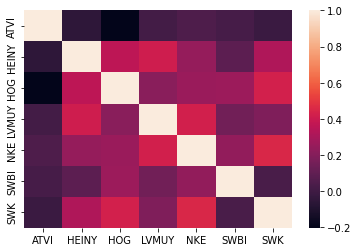

In [348]:
import seaborn as sns
sns.heatmap(returns.corr())


[*********************100%***********************]  1 of 1 completed


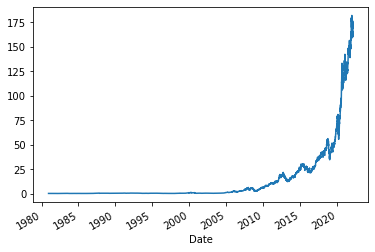

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  6 of 6 completed


,AAPL,AXP,BA,IBM,MU,WMT
Date,,,,,,
2022-02-11,168.639999,191.809998,212.300003,132.690002,89.760002,135.330002
2022-02-14,168.880005,192.350006,210.039993,130.149994,89.860001,133.949997
2022-02-15,172.789993,197.979996,217.729996,129.940002,96.000000,134.369995
2022-02-16,172.550003,198.380005,218.929993,129.179993,96.059998,133.529999
2022-02-17,168.880005,195.710007,213.580002,124.970001,93.730003,138.880005
